In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

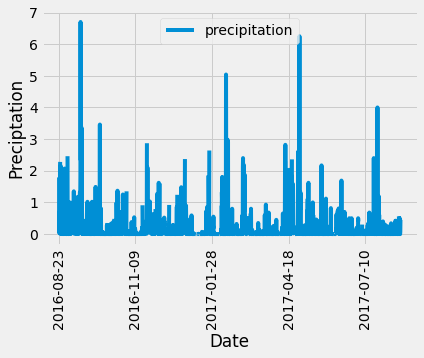

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
dateOI = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= dateOI)

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data, columns=['date', 'precipitation'])
prcp_df.set_index("date", inplace=True)

# Sort the dataframe by date
prcp_Graph = prcp_df.sort_values("date", ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
prcp_Graph.plot()
plt.xlabel("Date")
plt.ylabel("Preciptation")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset
station_data = session.query(Station)
station_data.count()

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
busiest_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

for row in busiest_stations:
    print(row.station, row[1])

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_stats = session.query(*[func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]).filter(Measurement.station == 'USC00519281').all()
print(temp_stats)

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_Data = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= dateOI)
temp_df = pd.DataFrame(temp_Data)
plt.hist(temp_df, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title("Station USC00519281 temp frequency")
plt.show()

# Close Session

In [ ]:
session.close()